In [2]:
import pandas as pd   
import numpy as np    
import datetime as dt 
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('udemy_courses.csv')

In [4]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
course_id              3678 non-null int64
course_title           3678 non-null object
url                    3678 non-null object
is_paid                3678 non-null bool
price                  3678 non-null int64
num_subscribers        3678 non-null int64
num_reviews            3678 non-null int64
num_lectures           3678 non-null int64
level                  3678 non-null object
content_duration       3678 non-null float64
published_timestamp    3678 non-null object
subject                3678 non-null object
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.7+ KB


In [6]:
data['published_timestamp'] = pd.to_datetime(data['published_timestamp'])

In [7]:
data['year'] = data['published_timestamp'].dt.year

In [8]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58,Business Finance,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20,Business Finance,2017
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30,Business Finance,2016
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24,Business Finance,2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18,Business Finance,2016


In [9]:
paid = data[data['is_paid'] == True]
paid.shape

(3368, 13)

In [10]:
free = data[data['is_paid'] == False]
free.shape

(310, 13)

**Number of Paid Courses per Subject.**

In [11]:
data[data['is_paid'] == True].groupby('subject').agg({'course_title':'count'})

,course_title
subject,
Business Finance,1099
Graphic Design,568
Musical Instruments,634
Web Development,1067


**Number of Free Courses per Subject.**

In [12]:
data[data['is_paid'] == False].groupby('subject').agg({'course_title':'count'})

,course_title
subject,
Business Finance,96
Graphic Design,35
Musical Instruments,46
Web Development,133


**Total number of subscribers with respective to subject and level.**

In [13]:
data.pivot_table(values='num_subscribers',index='subject',columns='level', aggfunc=np.sum)

level,All Levels,Beginner Level,Expert Level,Intermediate Level
subject,,,,
Business Finance,1047208,647007,30146,144350
Graphic Design,688332,315757,1008,58051
Musical Instruments,328170,429030,5431,84058
Web Development,4851366,2660049,13611,455546


**List of top 3 courses per year.**

In [14]:
years = data['year'].unique()
result = pd.DataFrame(columns=['year','course_title','num_subscribers'])
for year in years:
    temp = data[data['year'] == year][['year','course_title','num_subscribers']].sort_values(by='num_subscribers',ascending=False)[:3]
    result = pd.concat([result,temp],ignore_index=True)
print(result[['course_title','year']])

                                         course_title  year
0   The Ultimate Drawing Course - Beginner to Adva...  2017
1   The Complete NodeJS Course: Build a Full Busin...  2017
2             React JS and Redux - Mastering Web Apps  2017
3               The Complete Web Developer Course 2.0  2016
4   Angular 4 (formerly Angular 2) - The Complete ...  2016
5                               Javascript Essentials  2016
6   Build Your First Website in 1 Week with HTML5 ...  2014
7   Practical PHP: Master the Basics and Code Dyna...  2014
8   Pianoforall - Incredible New Way To Learn Pian...  2014
9                          The Web Developer Bootcamp  2015
10  Web Design for Web Developers: Build Beautiful...  2015
11          JavaScript: Understanding the Weird Parts  2015
12               Learn HTML5 Programming From Scratch  2013
13                     Coding for Entrepreneurs Basic  2013
14             Learn Javascript & JQuery From Scratch  2013
15              Free Beginner Electric G

**Top subscribed course according to subject.**

In [15]:
subjects=data['subject'].unique()
for subject in subjects:
    maxvalue=data[data['subject'] == subject]['num_subscribers'].max()
    course=data[data['num_subscribers'] == maxvalue]['course_title'].unique()
    print('In "{}" subject.The most subscribed course is "{}"'.format(subject,course[0]))

In "Business Finance" subject.The most subscribed course is "Bitcoin or How I Learned to Stop Worrying and Love Crypto"
In "Graphic Design" subject.The most subscribed course is "Photoshop In-Depth: Master all of Photoshop's Tools Easily"
In "Musical Instruments" subject.The most subscribed course is "Free Beginner Electric Guitar Lessons"
In "Web Development" subject.The most subscribed course is "Learn HTML5 Programming From Scratch"


**Total Duration with respective to subject and level.**

In [16]:
data.groupby(['subject','level']).agg({'content_duration':np.sum}).unstack()

content_duration                              \
level                     All Levels Beginner Level Expert Level   
subject                                                            
Business Finance         2862.166667     961.433333    58.516667   
Graphic Design           1208.383333     765.633333    23.000000   
Musical Instruments       884.966667     720.550000    18.000000   
Web Development          4438.050000    1478.200000    69.000000   

                                        
level               Intermediate Level  
subject                                 
Business Finance            363.716667  
Graphic Design              162.050000  
Musical Instruments         317.466667  
Web Development             728.500000

**Data Visualization**

Text(0, 0.5, 'Count')

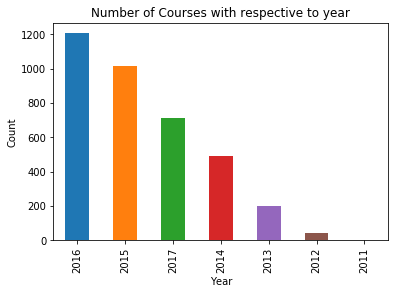

In [17]:
data["year"].value_counts().plot(kind='bar')
plt.title("Number of Courses with respective to year")
plt.xlabel("Year")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

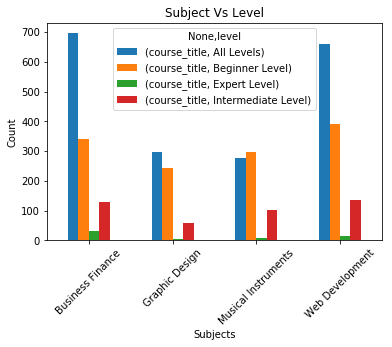

In [18]:
data.groupby(['subject','level']).agg({'course_title':'count'}).unstack().plot(kind='bar')
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Subject Vs Level")
plt.xlabel("Subjects")
plt.ylabel("Count")

Text(0, 0.5, 'Price')

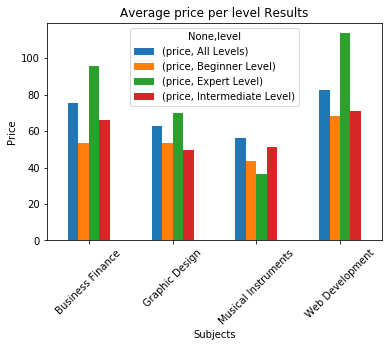

In [19]:
data.groupby(['subject','level']).agg({'price':np.average}).unstack().plot(kind='bar')
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Average price per level Results")
plt.xlabel("Subjects")
plt.ylabel("Price")